In [178]:
#HDI - Education
expected = pd.read_csv("expected_years.csv")
mean = pd.read_csv("mean_years.csv")

expected = expected.dropna(axis =1, how = "all")
mean = mean.dropna(axis =1, how = "all")

expected = expected.drop("HDI Rank (2018)", axis = 1)
mean = mean.drop("HDI Rank (2018)", axis = 1)

expected = pd.melt(expected, id_vars = ["Country"])
expected = expected.rename(columns = {"value" : "expected"})

mean = pd.melt(mean, id_vars = ["Country"])
mean = mean.rename(columns = {"value" : "mean"})

total = pd.merge(expected, mean, on = ["Country", "variable"])


In [179]:
total["expected"] = pd.to_numeric(total["expected"], errors = "coerce")/18
total["mean"] =  pd.to_numeric(total["mean"], errors = "coerce")/15
total["education_hdi"] = total[['expected', 'mean']].mean(axis=1)
total = total.dropna()

total["country"] = total["Country"]
total["year"] = total["variable"]
total.year = total.year.astype(int)

total.set_index(["country", "year"], inplace = True)
total = pd.DataFrame(total["education_hdi"])
total.reset_index(inplace = True)


In [1]:
### importing packages

import pandas as pd
import matplotlib as pyplot


In [2]:
###database
coucodes = pd.read_csv("CountryCodes.csv", sep = ";")
countries = coucodes["ISO Code"].tolist()

In [3]:
## importing education database

education = pd.read_csv('Education_codes.csv', header = 0)
education = education["index"].tolist()
education

['HD.HCI.EYRS',
 'HD.HCI.EYRS.FE',
 'HD.HCI.EYRS.MA',
 'SE.XPD.TOTL.GD.ZS',
 'SE.PRE.ENRR',
 'UIS.GER.12',
 'SE.SEC.ENRR',
 'SE.TER.ENRR',
 'SE.ADT.LITR.ZS',
 'UIS.EA.MEAN.1T6.AG25T99',
 'SE.SCH.LIFE.FE',
 'SE.SCH.LIFE.MA',
 'IT.NET.EDUC.ZS',
 'SE.SEC.CUAT.UP.ZS',
 'SE.SEC.CUAT.UP.FE.ZS',
 'SE.SEC.CUAT.UP.MA.ZS',
 'SE.PRM.DROP.ZS',
 'SE.PRM.TCAQ.ZS',
 'LO.PISA.MAT',
 'LO.PISA.REA',
 'LO.PISA.SCI',
 'SE.PRM.ENRL.TC.ZS',
 'UIS.SR.2.GPV.GLAST.CP.T',
 'SE.SCH.LIFE',
 'BAR.SCHL.25UP']

In [51]:
#downloading data from worldbank

import pandas_datareader
from pandas_datareader import wb

worldbank_data = pandas_datareader.wb.download(indicator = education, country = countries, start = 2010, end = 2020, freq = "A")
worldbank_data2 = pandas_datareader.wb.download(indicator = education, country = countries, start = 2000, end = 2009, freq = "A")
worldbank_data3 = pandas_datareader.wb.download(indicator = education, country = countries, start = 1990, end = 1999, freq = "A")

worldbank_data = pd.concat([worldbank_data, worldbank_data2])
worldbank_data = pd.concat([worldbank_data, worldbank_data3])

worldbank_data.reset_index(inplace=True)

C:\Users\Bebezi\Anaconda3\lib\site-packages\pandas_datareader\wb.py:659: UserWarning: No results found from world bank. Indicator: HD.HCI.EYRS
  warnings.warn(msg)
C:\Users\Bebezi\Anaconda3\lib\site-packages\pandas_datareader\wb.py:659: UserWarning: No results found from world bank. Indicator: HD.HCI.EYRS.FE
  warnings.warn(msg)
C:\Users\Bebezi\Anaconda3\lib\site-packages\pandas_datareader\wb.py:659: UserWarning: No results found from world bank. Indicator: HD.HCI.EYRS.MA
  warnings.warn(msg)
C:\Users\Bebezi\Anaconda3\lib\site-packages\pandas_datareader\wb.py:659: UserWarning: Problem with a World Bank Query 
 Invalid format 
  The indicator was not found. It may have been deleted or archived.. Indicator: IT.NET.EDUC.ZS
  warnings.warn(msg)


In [52]:
#from pupil to teacher to teacher to pupil
worldbank_data["SE.PRM.ENRL.TC.ZS"] = 1/worldbank_data["SE.PRM.ENRL.TC.ZS"]

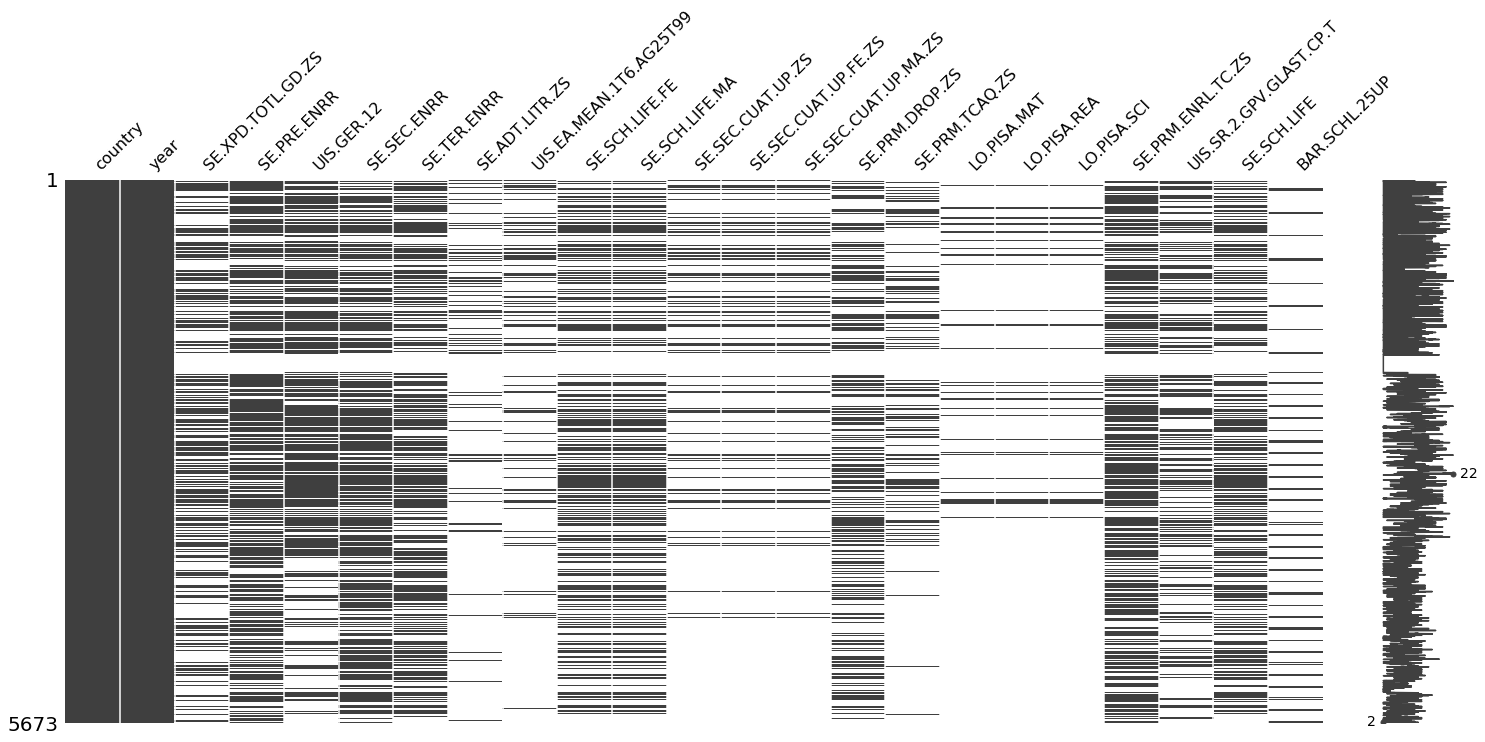

In [53]:
import missingno as msno
msno.matrix(worldbank_data)

In [54]:
worldbank_data

,country,year,SE.XPD.TOTL.GD.ZS,SE.PRE.ENRR,UIS.GER.12,SE.SEC.ENRR,SE.TER.ENRR,SE.ADT.LITR.ZS,UIS.EA.MEAN.1T6.AG25T99,SE.SCH.LIFE.FE,...,SE.SEC.CUAT.UP.MA.ZS,SE.PRM.DROP.ZS,SE.PRM.TCAQ.ZS,LO.PISA.MAT,LO.PISA.REA,LO.PISA.SCI,SE.PRM.ENRL.TC.ZS,UIS.SR.2.GPV.GLAST.CP.T,SE.SCH.LIFE,BAR.SCHL.25UP
0,Afghanistan,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2018,NaN,NaN,92.98388,NaN,9.68642,43.019720,NaN,7.71427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.17643,NaN
2,Afghanistan,2017,4.058870,NaN,90.99664,53.797640,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022722,77.78701,NaN,NaN
3,Afghanistan,2016,4.228360,NaN,90.29791,50.645400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.23996,NaN,NaN
4,Afghanistan,2015,3.255800,NaN,90.71627,52.592810,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022559,75.49352,NaN,NaN
5,Afghanistan,2014,3.695220,NaN,92.58327,52.582900,8.23068,NaN,NaN,7.81710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.17435,NaN
6,Afghanistan,2013,3.454460,NaN,91.58255,53.575130,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.021876,NaN,NaN,NaN
7,Afghanistan,2012,2.604200,NaN,91.37021,53.618050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022383,NaN,NaN,NaN
8,Afghanistan,2011,3.462010,NaN,87.46901,51.756910,3.62226,31.741120,NaN,7.22629,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022978,NaN,9.27881,NaN
9,Afghanistan,2010,3.479450,NaN,90.49162,50.567250,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022514,NaN,NaN,3.23


In [258]:
from fancyimpute import KNN, SoftImpute, IterativeImputer, MatrixFactorization  
worldbank_data_ind = worldbank_data.set_index('country')
worldbank_data_ind["country"] = worldbank_data_ind.index
worldbank_data_hotenco = pd.get_dummies(worldbank_data_ind, columns=["country"])
worldbank_data_filled = pd.DataFrame(IterativeImputer().fit_transform(worldbank_data_hotenco))
worldbank_data_filled.columns = worldbank_data_hotenco.columns
worldbank_data_filled["country"] = worldbank_data["country"]
worldbank_data_filled.set_index("country", inplace = True)
worldbank_data_filled = worldbank_data_filled[worldbank_data_filled.columns.drop(list(worldbank_data_filled.filter(regex='country')))]


C:\Users\Bebezi\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 974414 samples, validate on 108269 samples
Epoch 1/10000
974414/974414 [==============================] - 1s 1us/step - loss: 1.1656 - val_loss: 1.1393
Epoch 2/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.1640 - val_loss: 1.1385
Epoch 3/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.1628 - val_loss: 1.1377
Epoch 4/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.1618 - val_loss: 1.1370
Epoch 5/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.1607 - val_loss: 1.1362
Epoch 6/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.1596 - val_loss: 1.1354
Epoch 7/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.1585 - val_loss: 1.1346
Epoch 8/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.1574 - val_loss: 1.1338
Epoch 9/10000
974414/974414 [==============================] - 0s 0us/step -

974414/974414 [==============================] - 0s 0us/step - loss: 1.0912 - val_loss: 1.0857
Epoch 76/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0905 - val_loss: 1.0852
Epoch 77/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0898 - val_loss: 1.0847
Epoch 78/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0891 - val_loss: 1.0842
Epoch 79/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0884 - val_loss: 1.0836
Epoch 80/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0877 - val_loss: 1.0831
Epoch 81/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0870 - val_loss: 1.0826
Epoch 82/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0863 - val_loss: 1.0821
Epoch 83/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0857 - val_loss: 1.0816
Epoch 84/10000
974414/974

Epoch 150/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0516 - val_loss: 1.0561
Epoch 151/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0513 - val_loss: 1.0558
Epoch 152/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0509 - val_loss: 1.0555
Epoch 153/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0505 - val_loss: 1.0553
Epoch 154/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0501 - val_loss: 1.0550
Epoch 155/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0498 - val_loss: 1.0547
Epoch 156/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0494 - val_loss: 1.0544
Epoch 157/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0490 - val_loss: 1.0541
Epoch 158/10000
974414/974414 [==============================] - 0s 0us/step - loss: 1.0486 - val_loss: 1.0539
E

In [259]:
#scaling
import pandas as pd
from sklearn import preprocessing

x = worldbank_data_filled.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
worldbank_data_scaled = pd.DataFrame(x_scaled, columns = worldbank_data_filled.columns)
worldbank_data_scaled["year"] = worldbank_data_filled["year"].values.astype(int)
worldbank_data_scaled["country"] = worldbank_data_filled.index
worldbank_data_scaled.set_index(["country",'year'], inplace = True)

In [260]:
worldbank_data_scaled["indicator"] = worldbank_data_scaled.mean(axis=1)

In [261]:
worldbank_data_scaled.reset_index(inplace = True)


In [262]:
worldbank_data_scaled.year = worldbank_data_scaled.year.astype(int)
merged_data = pd.merge(worldbank_data_scaled, total, on = ["country", "year"])


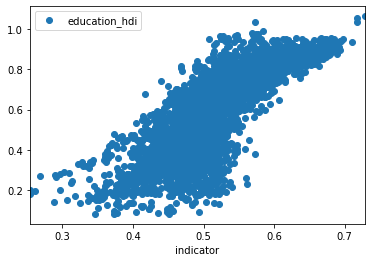

In [263]:
merged_data.plot(x='indicator', y='education_hdi', style='o')


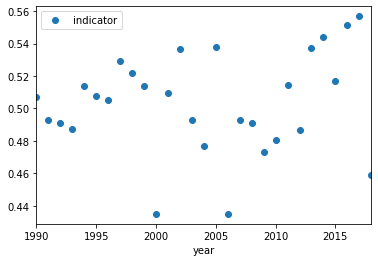

In [264]:
merged_data[merged_data["country"] == "Brazil"].plot(y='indicator', x='year', style='o')


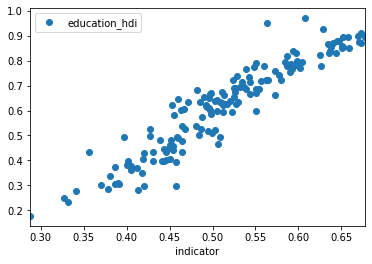

In [220]:
merged_data[merged_data["year"] == 2010].plot(x='indicator', y='education_hdi', style='o')


In [229]:
merged_data[merged_data["year"] == 2018].nlargest(10, 'indicator')

,country,year,SE.XPD.TOTL.GD.ZS,SE.PRE.ENRR,UIS.GER.12,SE.SEC.ENRR,SE.TER.ENRR,SE.ADT.LITR.ZS,UIS.EA.MEAN.1T6.AG25T99,SE.SCH.LIFE.FE,...,SE.PRM.TCAQ.ZS,LO.PISA.MAT,LO.PISA.REA,LO.PISA.SCI,SE.PRM.ENRL.TC.ZS,UIS.SR.2.GPV.GLAST.CP.T,SE.SCH.LIFE,BAR.SCHL.25UP,indicator,education_hdi
252,China,2018,0.116149,0.548096,0.637499,0.638863,0.489519,0.847628,1.000000,0.626997,...,0.691578,0.964661,0.974106,1.000000,0.450999,0.690738,0.603199,0.704093,0.714707,0.649444
1352,United States,2018,0.125473,0.486582,0.667969,0.658937,0.850111,0.812749,0.945542,0.780301,...,0.411035,0.776773,0.884105,0.845002,0.577851,0.692963,0.759966,0.744742,0.710107,0.899444
405,Estonia,2018,0.126587,0.495497,0.687634,0.695745,0.705323,0.696813,0.966514,0.747020,...,0.455928,0.851779,0.915975,0.893800,0.586656,0.617152,0.723377,0.739739,0.698190,0.880556
765,Latvia,2018,0.124188,0.492887,0.623556,0.704784,0.627020,0.649429,0.897021,0.693487,...,0.507460,0.806466,0.836016,0.818375,0.604924,0.606145,0.667606,0.743712,0.671425,0.871111
153,Belarus,2018,0.135292,0.609615,0.653700,0.664147,0.708108,0.863568,0.860142,0.648974,...,0.866915,0.766179,0.827157,0.790240,0.372306,0.607910,0.634600,0.642806,0.667315,0.837778
324,Germany,2018,0.116304,0.485671,0.587427,0.650853,0.672048,0.658384,0.974064,0.673153,...,0.445328,0.812971,0.871343,0.846073,0.581895,0.728134,0.651779,0.714499,0.665769,0.945000
18,Albania,2018,0.124928,0.504680,0.684162,0.625877,0.515381,0.854737,0.930146,0.641691,...,0.797506,0.708653,0.703823,0.694260,0.415819,0.551021,0.600877,0.655822,0.660161,0.758889
54,Australia,2018,0.119499,0.477520,0.618385,0.645888,0.722336,0.694247,0.856210,0.702316,...,0.409111,0.798551,0.879196,0.846030,0.560436,0.682853,0.682256,0.698768,0.659171,1.037222
351,Denmark,2018,0.126216,0.506216,0.532820,0.725640,0.652030,0.664373,0.882288,0.670665,...,0.457741,0.828505,0.876487,0.827855,0.623911,0.522410,0.643382,0.733699,0.644593,0.950556
234,Switzerland,2018,0.114385,0.489857,0.532802,0.677888,0.532722,0.555045,0.849303,0.607523,...,0.511245,0.838329,0.845453,0.832500,0.607703,0.687750,0.582447,0.719109,0.637711,0.896667


In [218]:
merged_data[merged_data["year"] == 2018].nlargest(10, 'education_hdi')

,country,year,SE.XPD.TOTL.GD.ZS,SE.PRE.ENRR,UIS.GER.12,SE.SEC.ENRR,SE.TER.ENRR,SE.ADT.LITR.ZS,UIS.EA.MEAN.1T6.AG25T99,SE.SCH.LIFE.FE,...,SE.PRM.TCAQ.ZS,LO.PISA.MAT,LO.PISA.REA,LO.PISA.SCI,SE.PRM.ENRL.TC.ZS,UIS.SR.2.GPV.GLAST.CP.T,SE.SCH.LIFE,BAR.SCHL.25UP,indicator,education_hdi
54,Australia,2018,0.177329,0.656691,0.669879,0.809285,0.500589,0.902231,0.864562,0.508674,...,0.577864,0.621688,0.764967,0.674064,0.503856,0.677699,0.494070,0.893691,0.646078,1.037222
351,Denmark,2018,0.225978,0.629176,0.667714,0.729588,0.423959,0.975287,0.890894,0.512336,...,0.598441,0.677939,0.759695,0.635589,0.847872,0.845008,0.494011,0.825049,0.666462,0.950556
603,Iceland,2018,0.198305,0.627141,0.609680,0.664472,0.360519,0.932263,0.831797,0.515195,...,0.617732,0.633623,0.664373,0.569972,0.784396,0.875134,0.494114,0.839584,0.599913,0.950000
423,Finland,2018,0.192709,0.455127,0.659142,0.703674,0.526915,0.856931,0.848947,0.513013,...,0.435609,0.671399,0.826210,0.744550,0.495194,0.742525,0.493975,0.759235,0.590462,0.949444
974,New Zealand,2018,0.192943,0.590113,0.652659,0.658555,0.440040,0.908353,0.907681,0.512136,...,0.464436,0.631447,0.775833,0.694652,0.508104,0.733437,0.494041,0.900360,0.593067,0.945556
324,Germany,2018,0.161277,0.670201,0.667690,0.617126,0.393774,0.952356,0.983565,0.507436,...,0.476125,0.648767,0.749689,0.674155,0.595137,0.639078,0.493936,0.844342,0.642115,0.945000
90,Belgium,2018,0.172312,0.725339,0.677663,0.819443,0.412653,0.889468,0.796023,0.513332,...,0.622816,0.673797,0.730681,0.658449,0.702795,0.832139,0.493997,0.829569,0.617619,0.940556
585,Ireland,2018,0.167730,0.715335,0.677812,0.714204,0.398500,0.876075,0.756048,0.511053,...,0.575290,0.647486,0.819188,0.648541,0.438807,0.799360,0.493924,0.840433,0.599941,0.938889
1208,Sweden,2018,0.200977,0.569010,0.672876,0.730328,0.412582,0.916505,0.843465,0.515062,...,0.561124,0.656077,0.776036,0.660951,0.754244,0.806490,0.493963,0.864707,0.612912,0.935556
956,Norway,2018,0.206140,0.591075,0.647652,0.712801,0.435483,0.966044,0.862492,0.512959,...,0.528730,0.651636,0.753802,0.627304,0.885170,0.809343,0.493961,0.868847,0.618534,0.922778


In [217]:
merged_data.corr()

,year,SE.XPD.TOTL.GD.ZS,SE.PRE.ENRR,UIS.GER.12,SE.SEC.ENRR,SE.TER.ENRR,SE.ADT.LITR.ZS,UIS.EA.MEAN.1T6.AG25T99,SE.SCH.LIFE.FE,SE.SCH.LIFE.MA,...,SE.PRM.TCAQ.ZS,LO.PISA.MAT,LO.PISA.REA,LO.PISA.SCI,SE.PRM.ENRL.TC.ZS,UIS.SR.2.GPV.GLAST.CP.T,SE.SCH.LIFE,BAR.SCHL.25UP,indicator,education_hdi
year,1.000000,0.070178,0.221445,0.199724,0.199823,0.286254,0.129625,0.256547,0.197708,0.251080,...,0.123921,0.002660,0.028738,-0.016517,0.179531,0.103932,0.232466,0.273397,0.237843,0.270373
SE.XPD.TOTL.GD.ZS,0.070178,1.000000,0.296141,0.240778,0.277351,0.237849,0.325796,0.273561,0.214757,0.211099,...,0.169432,0.108795,0.259032,-0.006254,0.284216,0.094151,0.221451,0.286316,0.324590,0.289972
SE.PRE.ENRR,0.221445,0.296141,1.000000,0.492945,0.670096,0.570943,0.624458,0.649761,0.543703,0.542362,...,0.319937,0.479219,0.513869,-0.000772,0.599101,0.381364,0.567136,0.661117,0.737035,0.695316
UIS.GER.12,0.199724,0.240778,0.492945,1.000000,0.673498,0.341858,0.640596,0.523074,0.591245,0.601297,...,0.243179,0.431086,0.567184,-0.278464,0.434873,0.260709,0.623558,0.497585,0.623973,0.645986
SE.SEC.ENRR,0.199823,0.277351,0.670096,0.673498,1.000000,0.679136,0.833783,0.831413,0.723560,0.702120,...,0.412932,0.648762,0.661046,-0.139933,0.761607,0.506301,0.744258,0.823517,0.884374,0.918373
SE.TER.ENRR,0.286254,0.237849,0.570943,0.341858,0.679136,1.000000,0.575551,0.678546,0.727861,0.696020,...,0.412322,0.438165,0.476304,0.040181,0.630070,0.437555,0.743850,0.685557,0.785531,0.741352
SE.ADT.LITR.ZS,0.129625,0.325796,0.624458,0.640596,0.833783,0.575551,1.000000,0.870486,0.601663,0.547302,...,0.411528,0.783988,0.777526,-0.274347,0.714441,0.466157,0.600143,0.827194,0.853412,0.887170
UIS.EA.MEAN.1T6.AG25T99,0.256547,0.273561,0.649761,0.523074,0.831413,0.678546,0.870486,1.000000,0.616949,0.582215,...,0.395676,0.682110,0.625044,-0.068243,0.751798,0.564027,0.626265,0.917475,0.914894,0.925046
SE.SCH.LIFE.FE,0.197708,0.214757,0.543703,0.591245,0.723560,0.727861,0.601663,0.616949,1.000000,0.826675,...,0.299234,0.449870,0.532856,-0.066405,0.591137,0.397727,0.957106,0.605482,0.789324,0.701541
SE.SCH.LIFE.MA,0.251080,0.211099,0.542362,0.601297,0.702120,0.696020,0.547302,0.582215,0.826675,1.000000,...,0.287565,0.389346,0.460893,-0.040545,0.556000,0.366947,0.953742,0.581050,0.749668,0.675357


In [ ]:
#Indicators
#Government expenditure on education (% of GDP),
#Gross enrolment ratio, pre-primary (% of preschool-age children),
#Gross enrolment ratio, primary (% of primary school-age population),
#Gross enrolment ratio, secondary (% of secondary school-age population),
#Gross enrolment ratio, tertiary (% of tertiary school-age population),
#Literacy rate, adult (% ages 15 and older),
#Mean years of schooling (years),(this and the expected years of schooling compose the education hdi)
#Mean years of schooling, female (years),
#Mean years of schooling, male (years), (this could be used to create a third variable, indicating the difference between genders)
#Population with at least some secondary education (% ages 25 and older),
#Population with at least some secondary education, female (% ages 25 and older),
#Population with at least some secondary education, male (% ages 25 and older),
#Primary school dropout rate (% of primary school cohort),
#Primary school teachers trained to teach (%),
#Programme for International Student Assessment (PISA) score in mathematics,
#Programme for International Student Assessment (PISA) score in reading,
#Programme for International Student Assessment (PISA) score in science,
#Pupil-teacher ratio, primary school (number of pupils per teacher),
#Survival rate to the last grade of lower secondary general education (%),


In [221]:
worldbank_data_scaled[worldbank_data_scaled["year"] == 2019].nlargest(10, 'indicator')

,country,year,SE.XPD.TOTL.GD.ZS,SE.PRE.ENRR,UIS.GER.12,SE.SEC.ENRR,SE.TER.ENRR,SE.ADT.LITR.ZS,UIS.EA.MEAN.1T6.AG25T99,SE.SCH.LIFE.FE,...,SE.PRM.DROP.ZS,SE.PRM.TCAQ.ZS,LO.PISA.MAT,LO.PISA.REA,LO.PISA.SCI,SE.PRM.ENRL.TC.ZS,UIS.SR.2.GPV.GLAST.CP.T,SE.SCH.LIFE,BAR.SCHL.25UP,indicator
450,Denmark,2019,0.217245,0.640393,0.680699,0.706407,0.441658,0.952881,0.874082,0.512734,...,0.114230,0.590869,0.566652,0.635973,0.550526,0.844084,0.805337,0.493797,0.847933,0.608378
1230,Norway,2019,0.203630,0.607388,0.645665,0.675386,0.443927,0.939668,0.872876,0.513073,...,0.105097,0.564894,0.549517,0.635739,0.550867,0.881478,0.777437,0.493868,0.898843,0.603218
100,Belgium,2019,0.174130,0.726555,0.689225,0.815290,0.422228,0.893026,0.797947,0.513072,...,0.137553,0.585261,0.559564,0.641961,0.550954,0.701605,0.781482,0.493898,0.829728,0.600657
280,Switzerland,2019,0.164366,0.688091,0.720807,0.604569,0.348962,0.962543,0.888577,0.508447,...,0.125352,0.580960,0.580225,0.633106,0.557028,0.754287,0.768369,0.493741,0.891297,0.598869
60,Australia,2019,0.166937,0.664947,0.667148,0.834401,0.486230,0.910424,0.854215,0.509995,...,0.089162,0.631205,0.555542,0.629299,0.559679,0.529305,0.761071,0.493986,0.917658,0.598232
1530,Sweden,2019,0.198338,0.580194,0.666836,0.708762,0.411301,0.904853,0.855469,0.515432,...,0.098473,0.609258,0.547636,0.636785,0.550286,0.758867,0.806763,0.493835,0.895951,0.597076
1220,Netherlands,2019,0.162263,0.659350,0.737784,0.725623,0.426070,0.912200,0.836453,0.509272,...,0.106300,0.588790,0.555058,0.634323,0.559165,0.604206,0.757219,0.493761,0.879637,0.592934
790,Israel,2019,0.181600,0.669651,0.681491,0.616984,0.384413,0.930049,0.859196,0.512526,...,0.101832,0.625095,0.541264,0.635500,0.539270,0.638636,0.764992,0.493719,0.939410,0.591214
520,Estonia,2019,0.179710,0.633840,0.667328,0.643507,0.388995,0.879235,0.902477,0.514909,...,0.124151,0.606480,0.546090,0.625480,0.560804,0.631668,0.801168,0.493780,0.895621,0.590136
780,Iceland,2019,0.199990,0.640804,0.626267,0.631754,0.386018,0.911954,0.831356,0.514652,...,0.126836,0.566978,0.572214,0.631756,0.549740,0.768542,0.778518,0.494066,0.798592,0.586896
